In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

In [2]:
hist_df = pd.read_excel('/Users/tomwong/Downloads/Go.com_Assignment_Data_modified.xlsx', sheet_name='Historical Data')

In [3]:
sales_df = pd.read_excel('/Users/tomwong/Downloads/Go.com_Assignment_Data_modified.xlsx', sheet_name='Sales Data')

In [4]:
hist_df.columns = ['ds', 'y', 'Expense', 'Profit', 'Website']
sales_df.columns = ['ds', 'y', 'Product Line']

In [5]:
hist_df

,ds,y,Expense,Profit,Website
0,2013-10-01,6085063.00,5.476557e+06,6.085063e+05,Cars.go.com
1,2014-01-01,5663582.00,5.097224e+06,5.663582e+05,Cars.go.com
2,2014-04-01,5701994.00,5.131795e+06,5.701994e+05,Cars.go.com
3,2014-07-01,5691910.00,5.122719e+06,5.691910e+05,Cars.go.com
4,2014-10-01,5906352.00,5.315717e+06,5.906352e+05,Cars.go.com
5,2015-01-01,16757524.80,1.508177e+07,1.675752e+06,Cars.go.com
6,2013-10-01,32339403.00,3.217771e+07,1.616970e+05,Planes.go.com
7,2014-01-01,34861524.00,3.468722e+07,1.743076e+05,Planes.go.com
8,2014-04-01,36039564.00,3.585937e+07,1.801978e+05,Planes.go.com
9,2014-07-01,34422242.00,3.425013e+07,1.721112e+05,Planes.go.com


In [6]:
sales_df

,ds,y,Product Line
0,2015-01-01,108632.400,Cars.go.com
1,2015-01-01,31494.015,Planes.go.com
2,2015-01-01,239376.480,Boats.go.com
3,2015-01-02,552064.800,Cars.go.com
4,2015-01-02,238344.120,Planes.go.com
5,2015-01-02,37594.560,Boats.go.com
6,2015-01-03,334413.600,Cars.go.com
7,2015-01-03,51614.010,Planes.go.com
8,2015-01-03,24042.720,Boats.go.com
9,2015-01-04,320344.800,Cars.go.com


In [7]:
sales_df_cars = sales_df.loc[sales_df['Product Line'] == 'Cars.go.com'][['ds', 'y']]

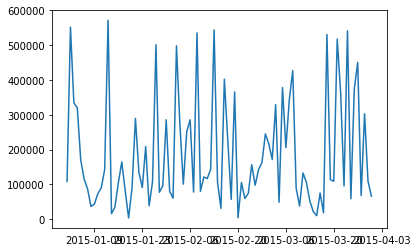

In [8]:
x = sales_df_cars[['ds']].values
y = sales_df_cars[['y']].values
fig, ax = plt.subplots()
ax.plot(x, y)

fbprophet - Why?

Concisely combines the best of time-series models, including GARCH, ARIMA

In [10]:
from fbprophet.plot import add_changepoints_to_plot,plot_forecast_component

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/tomwong/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


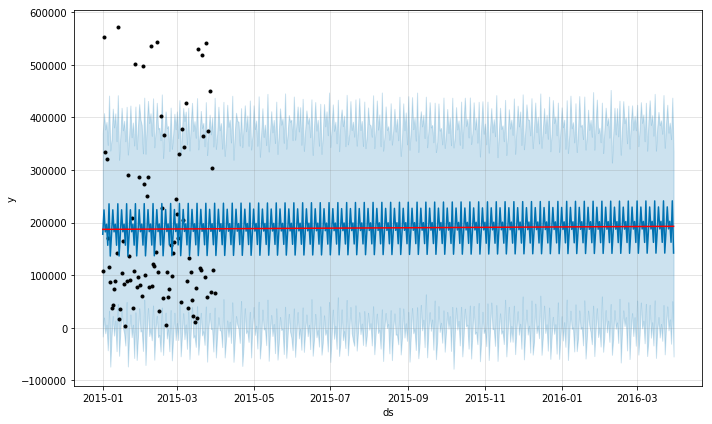

In [11]:
m_sales_df_cars = Prophet(weekly_seasonality=True) #changepoint_range=1,changepoint_prior_scale=.15 #changepoint_prior_scale=0.15
m_sales_df_cars.fit(sales_df_cars)
future_sales_cars = m_sales_df_cars.make_future_dataframe(periods=365)
forecast_sales_cars = m_sales_df_cars.predict(future_sales_cars)
forecast_sales_cars_plot = m_sales_df_cars.plot(forecast_sales_cars)
forecast_sales_cars_plot
# plt.show()

# fig = m.plot(forecast)
a = add_changepoints_to_plot(forecast_sales_cars_plot.gca(), m_sales_df_cars, forecast_sales_cars)

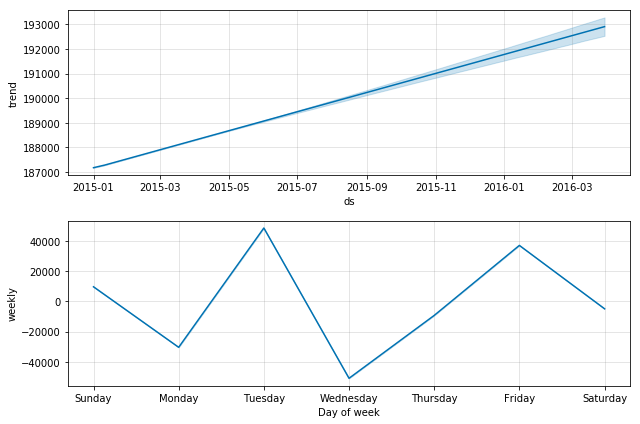

In [12]:
fig = m_sales_df_cars.plot_components(forecast_sales_cars)